# Autoencoder on MNIST Dataset

## Import modules

In [3]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
from keras.callbacks import TensorBoard
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Load dataset

In [5]:
# load the dataset without labels
(x_train, _), (x_test, _) = mnist.load_data()

# reshape the input data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## Build the autoencoder

In [18]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
# add a Dense layer with a L1 activity regularizer
#encoded = Dense(encoding_dim, activation='relu',
#                activity_regularizer=regularizers.l1(10e-5))(input_img)
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [19]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [20]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

## Train the autoencoder

Let's visualize the results of a model during training using the TensorFlow backend and the TensorBoard callback.

In [ ]:
!tensorboard --logdir=/tmp/autoencoder

open [tensorboard](http://job-ffcce10f-5ff8-4856-86c4-2ec27f650395-hk4r4:6006)

In [21]:
# let's compile the model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# let's train the model

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 96us/step - loss: 0.3081 - val_loss: 0.2535
Epoch 2/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.2333 - val_loss: 0.2128
Epoch 3/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.2017 - val_loss: 0.1900
Epoch 4/100
60000/60000 [==============================] - 6s 92us/step - loss: 0.1844 - val_loss: 0.1769
Epoch 5/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.1734 - val_loss: 0.1674
Epoch 6/100
60000/60000 [==============================] - 6s 96us/step - loss: 0.1647 - val_loss: 0.1593
Epoch 7/100
60000/60000 [==============================] - 6s 95us/step - loss: 0.1571 - val_loss: 0.1521
Epoch 8/100
60000/60000 [==============================] - 6s 93us/step - loss: 0.1504 - val_loss: 0.1458
Epoch 9/100
60000/60000 [==============================] - 6s 98us/step - loss: 0.1446 - val_loss: 0.1

## Visualization

In [23]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# or

decoded_imgs = autoencoder.predict(x_test)

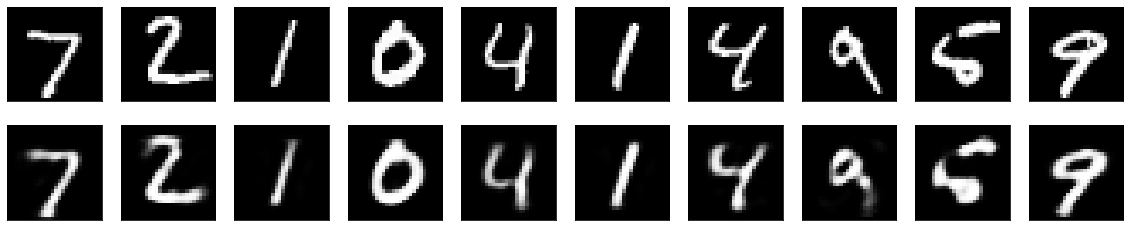

In [24]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

decoded_imgs = autoencoder.predict(x_test)